---
 <h1 style='text-align: center;'> 🌍  TRACKING THE ENERGY TRANSITION: A GLOBAL DATA REVIEW </h1>

 ***
 
       

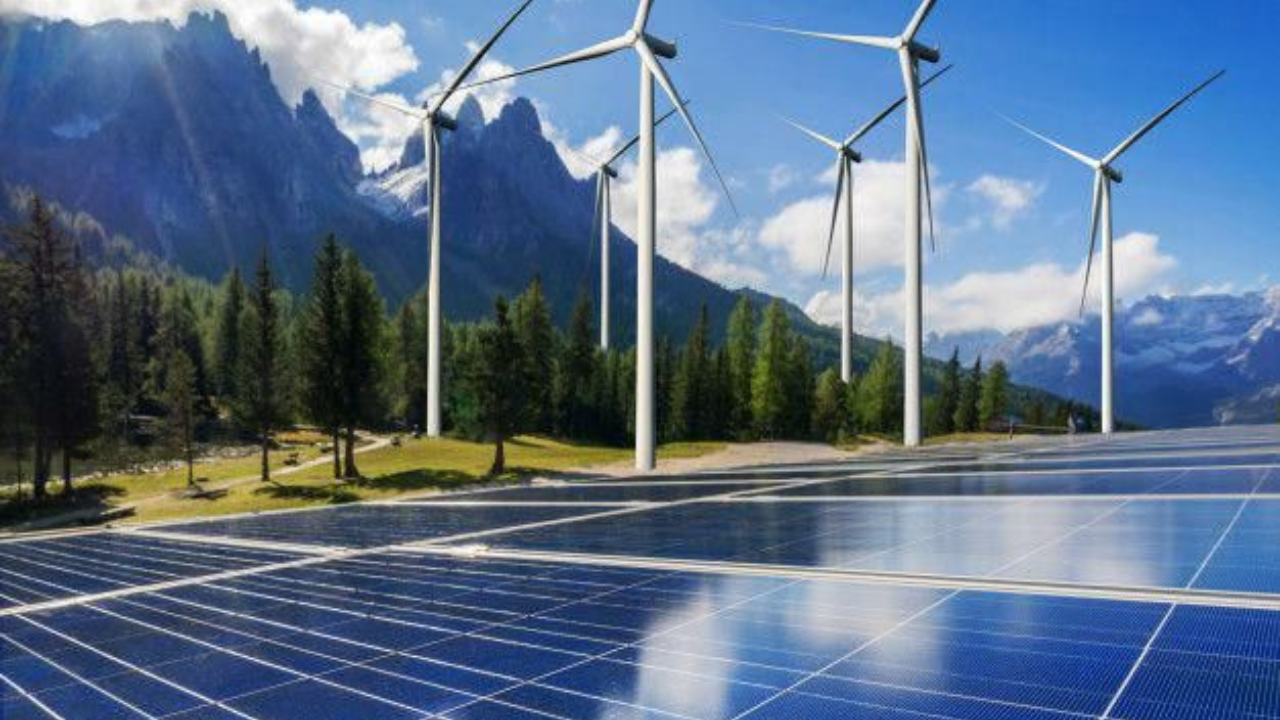

### PURPOSE OF DATASET
 
This dataset provides global metrics on access to sustainable energy, including electricity access, 
renewable energy consumption, and energy efficiency indicators across different countries and regions over time. The purpose of this dataset is to analyze global progress towards sustainable energy goals, particularly those outlined in UN SDG 7: Affordable and Clean Energy. Organizations, policymakers, and NGOs can use this data to:

- Identify regions lagging behind in energy access.

- Evaluate renewable energy adoption rates.

- Design energy-related development programs.

- Track progress toward carbon neutrality and sustainability targets.

### PROBLEM STATEMENT




Despite global targets for sustainable development, many countries—especially in the developing world—are still struggling to expand access to electricity, shift away from fossil fuels, and scale renewable energy. Financial support for these transitions is often inconsistent, and policy efforts may not be aligned with data-driven insights. As a result, there is a critical need to analyze the effectiveness of global energy investments and energy access initiatives in order to inform future strategies for inclusive, clean, and sustainable energy systems.

### OBJECTIVES

- Top 10 countries by the amount of electricity generated from renewable sources in 2000 and 2020

- Analysing financial flows and its correlation with renewable capacity and co2 emmissions

- Analysing how energy-related factors associated with economic and social development outcomes

- Exploring the interrelationships among energy access, energy sources, consumption patterns, and economic indicators

- Illustrating the global energy mix by quantifying the share of renewable versus non-renewable sources

- Evaluate the effectiveness of national policies in reducing per capita CO₂ emissions

- Analysing electricity generation sources over time in Ghana

- Analysing financial flows for clean energy among selected recipient countries

- Countries to prioritize global investment to optimize clean energy deployment

- Develop a predictive model for electricity access using economic and energy indicators.

### QUESTIONS THE ANALYSIS COVERS


- What are top 10 countries by the amount of electricity generated from renewable sources in 2000 and 2020?

- Do financial flows correlate more with renewable capacity or CO₂ emissions?

- Do financial flows correlate more with renewable capacity or CO₂ emissions?

- What countries show the strongest policy impact in reducing CO₂ per capita?

- Does higher renewable capacity translate to lower CO₂ emissions or fossil fuel usage?

- Are developing countries catching up in renewable electricity adoption compared to developed ones?

- Which variables are the strongest predictors of low carbon electricity production?

- Where should future investments go to maximize clean energy impact globally?

In [222]:
pip install pycountry_convert

In [229]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import plotly.express as px
from IPython.display import FileLink
FileLink('my_chart.png')
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.colors import LinearSegmentedColormap
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import scale 
scaler = StandardScaler()
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
#import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [231]:
# loading the dataset
dataset = pd.read_csv("global-data-on-sustainable-energy.csv")

In [233]:
dataset.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [235]:
# checking the shape of the dataset
dataset.shape

(3649, 21)

In [237]:
dataset.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [239]:
# Changing column names
dataset.columns = [
    "country",                    
    "year",                       
    "electricity_access",         
    "clean_cooking",              
    "renewable_capacity",         
    "financial_flows",            
    "renewable_share",            
    "fossil_electricity",         
    "nuclear_electricity",        
    "renewable_electricity",      
    "low_carbon_electricity",     
    "energy_consumption",         
    "energy_intensity",           
    "co2_emissions",              
    "renewables",                 
    "gdp_growth",                 
    "gdp_per_capita",             
    "density",                    
    "land_area",                  
    "latitude",      
    "longitude"                   
]

In [241]:
dataset.dtypes

country                    object
year                        int64
electricity_access        float64
clean_cooking             float64
renewable_capacity        float64
financial_flows           float64
renewable_share           float64
fossil_electricity        float64
nuclear_electricity       float64
renewable_electricity     float64
low_carbon_electricity    float64
energy_consumption        float64
energy_intensity          float64
co2_emissions             float64
renewables                float64
gdp_growth                float64
gdp_per_capita            float64
density                    object
land_area                 float64
latitude                  float64
longitude                 float64
dtype: object

In [243]:
# Clean column names: remove spaces, convert to lowercase, replace spaces with underscores
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(" ", "_")

# Now confirm the cleaned names
print(dataset.columns.tolist())


['country', 'year', 'electricity_access', 'clean_cooking', 'renewable_capacity', 'financial_flows', 'renewable_share', 'fossil_electricity', 'nuclear_electricity', 'renewable_electricity', 'low_carbon_electricity', 'energy_consumption', 'energy_intensity', 'co2_emissions', 'renewables', 'gdp_growth', 'gdp_per_capita', 'density', 'land_area', 'latitude', 'longitude']


In [245]:
# Check for missing values
dataset.isna().sum()

country                      0
year                         0
electricity_access          10
clean_cooking              169
renewable_capacity         931
financial_flows           2089
renewable_share            194
fossil_electricity          21
nuclear_electricity        126
renewable_electricity       21
low_carbon_electricity      42
energy_consumption           0
energy_intensity           207
co2_emissions              428
renewables                2137
gdp_growth                 317
gdp_per_capita             282
density                      1
land_area                    1
latitude                     1
longitude                    1
dtype: int64

In [394]:
dataset.fillna({
    "electricity_access" : 0.0,
    "clean_cooking" : 0.0,
    "renewable_capacity" : 0.0,
    "financial_flows" : 0.0,
    "renewable_share" : 0.0,
    "fossil_electricity" : 0.0,
    "nuclear_electricity" : 0.0,
    "renewable_electricity" : 0.0,
    "low_carbon_electricity" : 0.0,
    "energy_intensity" : 0.0,
    "co2_emissions" : 0.0,
    "renewables" : 0.0,
    "gdp_growth" : 0.0,
    "gdp_per_capita" : 0.0,
    "density" : 0.0,
    "land_area" : 0.0,
    "latitude" : 0.0,
    "longitude" : 0.0,
    "co2_per_capita" : 0.0,
    "population" : 0.0
}, inplace=True)

In [249]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 3649 non-null   object 
 1   year                    3649 non-null   int64  
 2   electricity_access      3649 non-null   float64
 3   clean_cooking           3649 non-null   float64
 4   renewable_capacity      3649 non-null   float64
 5   financial_flows         3649 non-null   float64
 6   renewable_share         3649 non-null   float64
 7   fossil_electricity      3649 non-null   float64
 8   nuclear_electricity     3649 non-null   float64
 9   renewable_electricity   3649 non-null   float64
 10  low_carbon_electricity  3649 non-null   float64
 11  energy_consumption      3649 non-null   float64
 12  energy_intensity        3649 non-null   float64
 13  co2_emissions           3649 non-null   float64
 14  renewables              3649 non-null   

In [251]:
# Check for any duplicate rows in the dataset
dataset.duplicated().any()

False

In [253]:
# Saving to a csv
dataset.to_csv("energy_data_cleaned.csv", index=False)

###
### DATA EXPLORATORY ANALYSIS

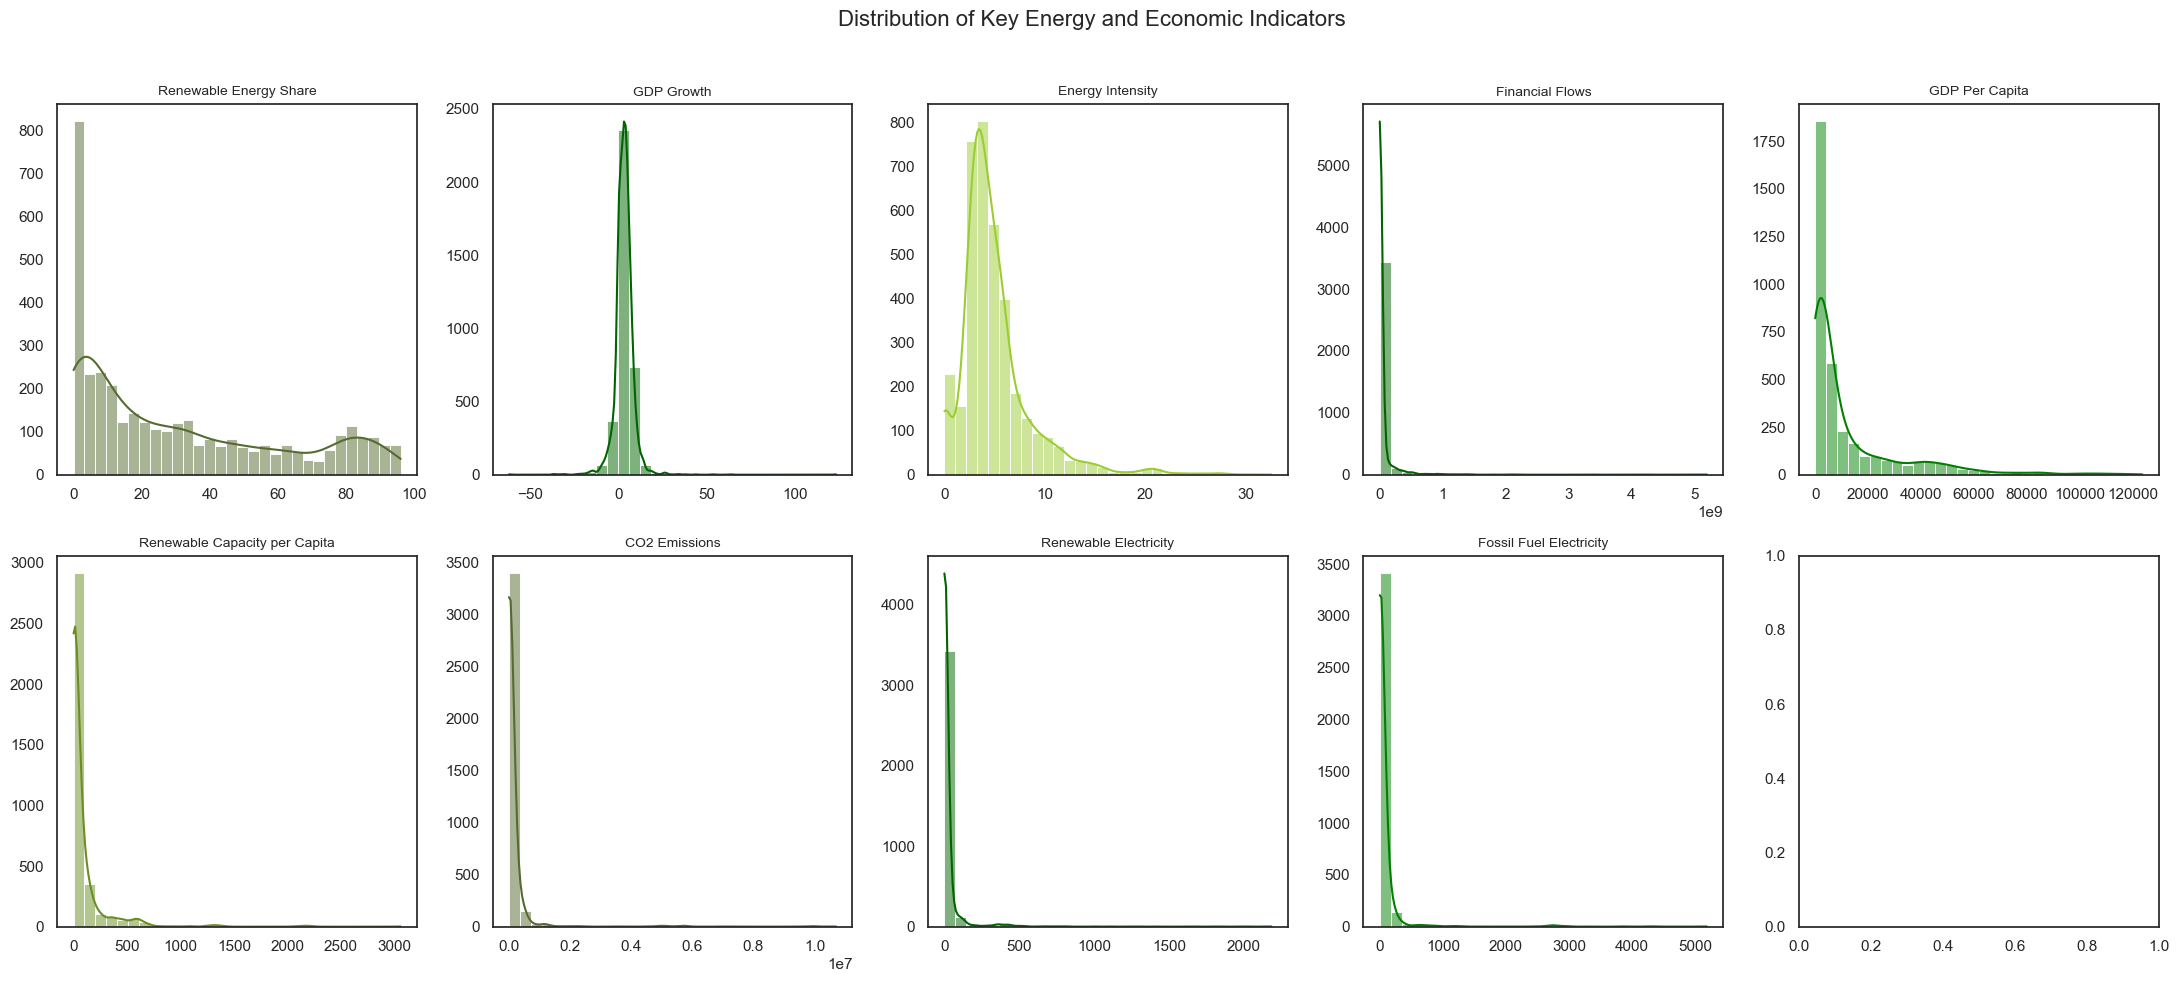

In [255]:
columns = [
    ("renewable_share", "Renewable Energy Share", "#556B2F"), 
    ("gdp_growth", "GDP Growth", "#006400"), 
    ("energy_intensity", "Energy Intensity", "#9ACD32"),  
    ("financial_flows", "Financial Flows", "#006400"), 
    ("gdp_per_capita", "GDP Per Capita", "#008000"),  
    ("renewable_capacity", "Renewable Capacity per Capita", "#6B8E23"),  
    ("co2_emissions", "CO2 Emissions", "#556B2F"),  
    ("renewable_electricity", "Renewable Electricity", "#006400"),  
    ("fossil_electricity", "Fossil Fuel Electricity", "#008000") 
]

# Set up subplots: 2 rows x 5 columns
fig, axes = plt.subplots(2, 5, figsize=(22, 10))
fig.suptitle("Distribution of Key Energy and Economic Indicators", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and plot each histogram
for i, (col, title, color) in enumerate(columns):
    sns.histplot(dataset[col].dropna(), bins=30, kde=True, color=color, ax=axes[i])
    axes[i].set_title(title, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()

### 
### CHECKING FOR OUTLIERS

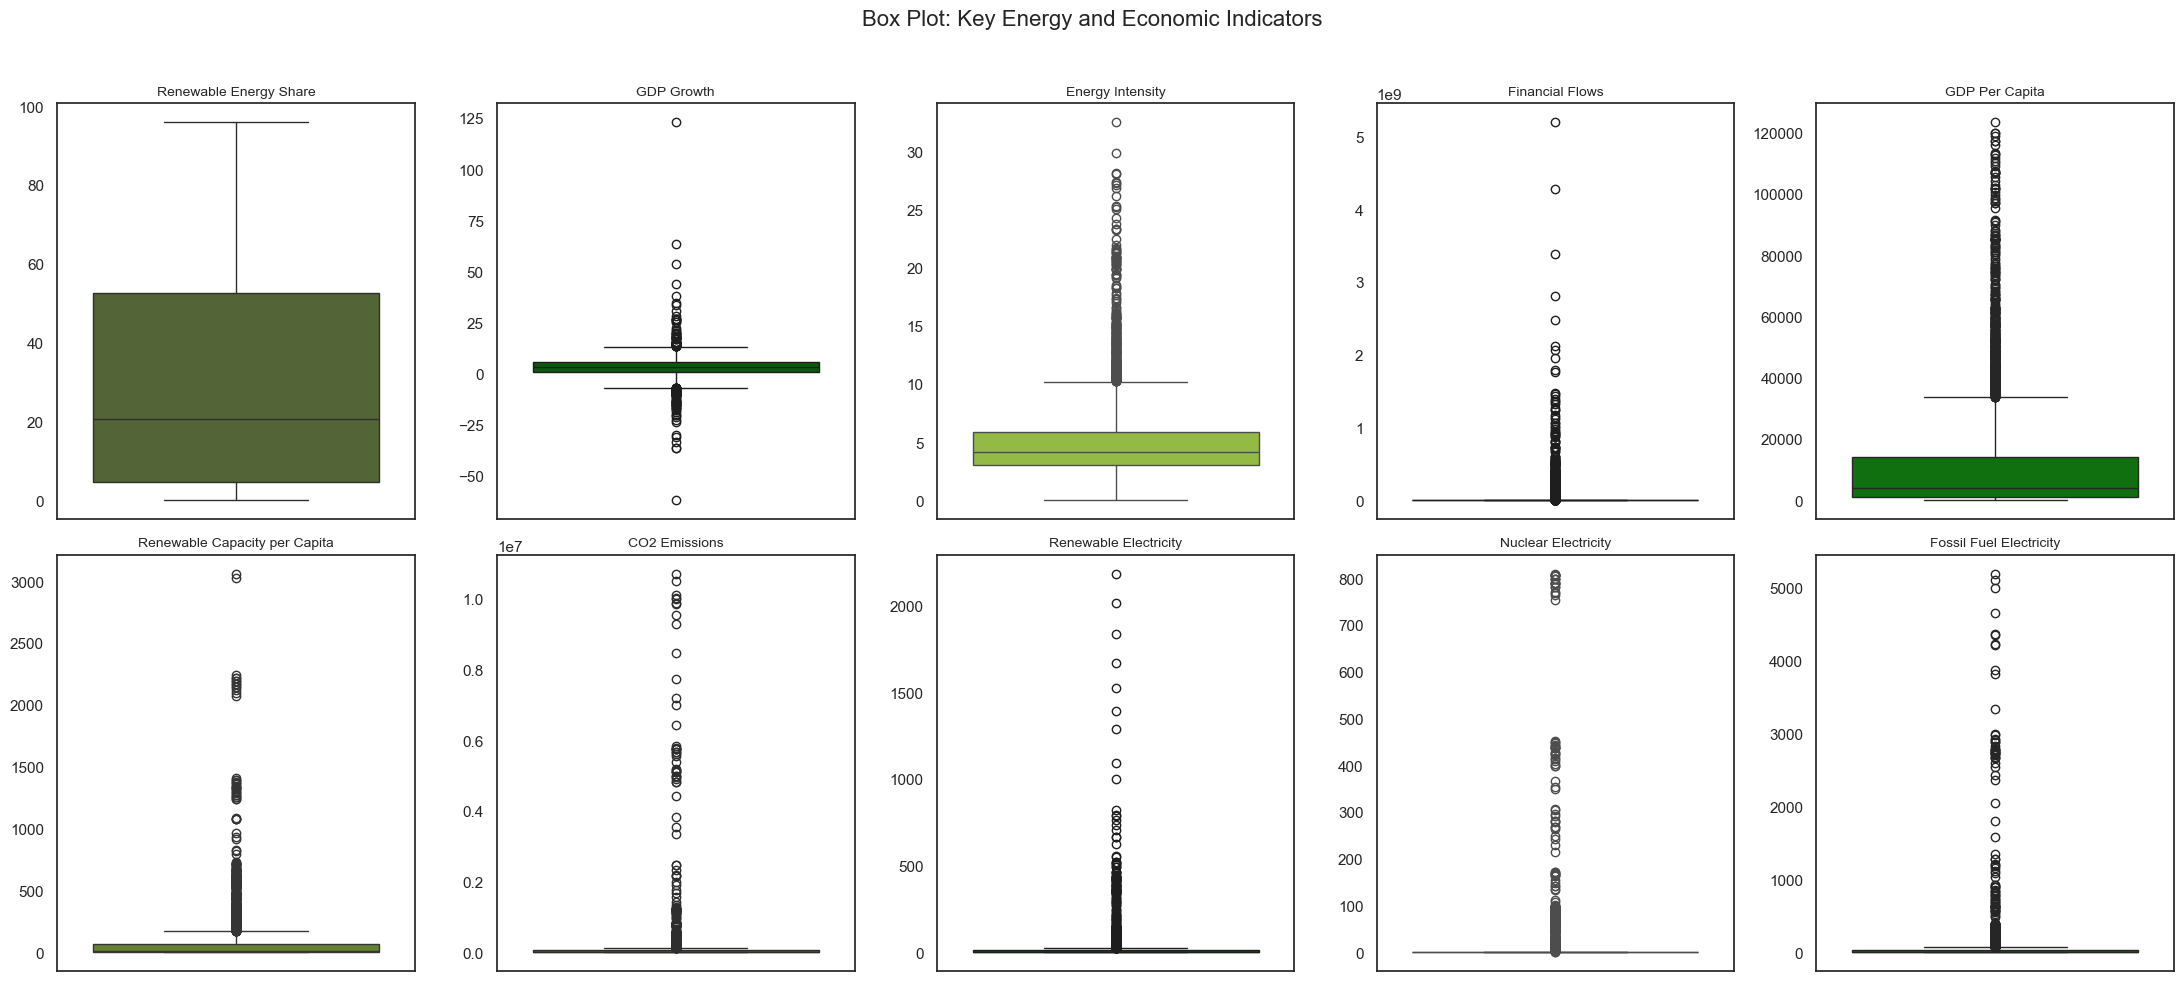

In [259]:
# Define column info and assign one of the three colors (rotating)
columns = [
    ("renewable_share", "Renewable Energy Share", "#556B2F"), 
    ("gdp_growth", "GDP Growth", "#006400"), 
    ("energy_intensity", "Energy Intensity", "#9ACD32"),  
    ("financial_flows", "Financial Flows", "#006400"), 
    ("gdp_per_capita", "GDP Per Capita", "#008000"),  
    ("renewable_capacity", "Renewable Capacity per Capita", "#6B8E23"),  
    ("co2_emissions", "CO2 Emissions", "#556B2F"),  
    ("renewable_electricity", "Renewable Electricity", "#006400"),  
    ("nuclear_electricity", "Nuclear Electricity", "#9ACD32"), 
    ("fossil_electricity", "Fossil Fuel Electricity", "#008000") 
]

# Set up subplots: 2 rows x 5 columns
fig, axes = plt.subplots(2, 5, figsize=(22, 10))
fig.suptitle("Box Plot: Key Energy and Economic Indicators", fontsize=16)

axes = axes.flatten()

# Loop through columns and create box plots
for i, (col, title, color) in enumerate(columns):
    sns.boxplot(y=dataset[col].dropna(), color=color, ax=axes[i])
    axes[i].set_title(title, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###
### INDEPTH ANALYSIS OF DATASET

### 1. Examing the global energy mix by quantifying the share of renewable versus non-renewable sources

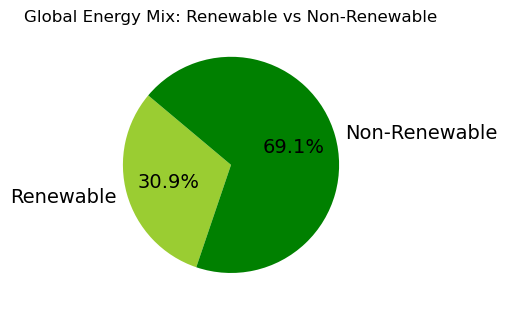

In [49]:
# We'll use average renewable_share to estimate this split globally
renewable_avg = dataset['renewable_share'].dropna().mean()
non_renewable_avg = 100 - renewable_avg

# Create pie chart data
energy_mix = pd.DataFrame({
    'Source': ['Renewable', 'Non-Renewable'],
    'Share': [renewable_avg, non_renewable_avg]
})

# Define color palette
colors = ["#9ACD32", "#006400", "#9ACD32", "#008000", "#6B8E23"]
pie_colors = [colors[0], colors[3]] 

# Plot pie chart
plt.figure(figsize=(5, 8))
plt.pie(
    energy_mix['Share'],
    labels=energy_mix['Source'],
    autopct='%1.1f%%',
    startangle=140,
    colors=pie_colors,
    textprops={'fontsize': 14}
)
plt.title('Global Energy Mix: Renewable vs Non-Renewable', fontsize=12)
plt.tight_layout()
plt.savefig('pie_chart.png',    # filename (can be .png, .pdf, .svg, etc.)
            dpi=300,           # resolution
            bbox_inches='tight')
plt.show()

### Findings

- Renewables account for roughly 29% of the global energy mix.

- Non-renewables dominate with approximately 71%, highlighting a persistent reliance on fossil fuels.

### Recommendations to Stakeholders
- Global energy systems are still fossil-fuel heavy — this limits climate progress.

- Accelerate clean energy transitions by investing in grid upgrades, storage, and incentives.

- Cross-country collaboration is crucial — especially in tech transfer, financing, and policy guidance for low-emission solutions.

###
### 2. Analysing top 10 countries by the amount of electricity generated from renewable sources in 2000 and 2020

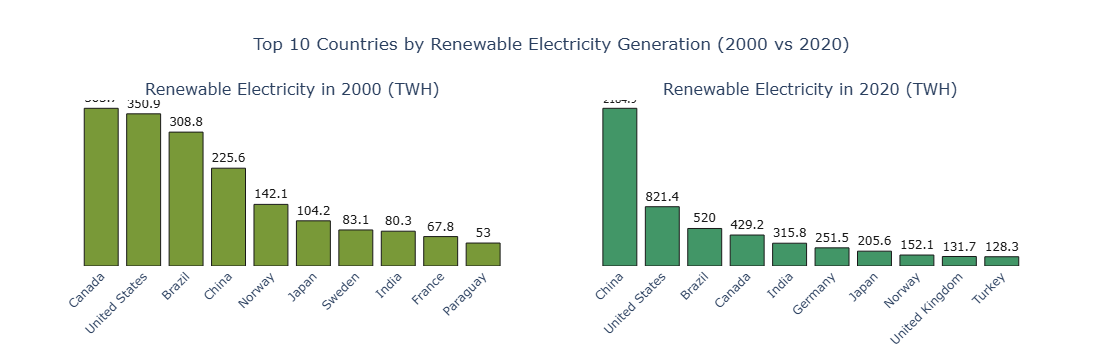

In [262]:
# Filter top 10 countries for each year
dataset_2000_top = dataset[dataset['year'] == 2000].sort_values(by='renewable_electricity', ascending=False).head(10)
dataset_2020_top = dataset[dataset['year'] == 2020].sort_values(by='renewable_electricity', ascending=False).head(10)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Renewable Electricity in 2000 (TWH)", "Renewable Electricity in 2020 (TWH)"))

# 2000 chart
fig.add_trace(go.Bar(
    x=dataset_2000_top['country'],
    y=dataset_2000_top['renewable_electricity'],
    text=dataset_2000_top['renewable_electricity'].round(1),
    textposition='outside',
    textfont=dict(size=12, color='black'),
    marker=dict(color='#6B8E23', line=dict(color='black', width=1)),
    opacity=0.9
), row=1, col=1)

# 2020 chart
fig.add_trace(go.Bar(
    x=dataset_2020_top['country'],
    y=dataset_2020_top['renewable_electricity'],
    text=dataset_2020_top['renewable_electricity'].round(1),
    textposition='outside',
    textfont=dict(size=12, color='black'),
    marker=dict(color='#2E8B57', line=dict(color='black', width=1)),
    opacity=0.9
), row=1, col=2)

# Layout settings to remove background and gridlines
fig.update_layout(
    title_text='Top 10 Countries by Renewable Electricity Generation (2000 vs 2020)',
    title_x=0.5,
    showlegend=False,
    height=600,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Remove gridlines and axis titles
fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)
fig.update_xaxes(tickangle=-45, showgrid=False, zeroline=False)

# Show plot
fig.show()

### Findings

- In 2000, the top 10 countries were generating relatively lower amounts of renewable electricity.

- By 2020, there’s a noticeable increase in the scale of renewable energy generation, and new countries emerged in the top 10 list.

- The countries leading in 2020 show a significant shift towards clean energy investment over the 20-year period.

### Recommendations

- Promote policy incentives in countries lagging behind in renewable electricity to boost adoption.

- Encourage technology transfer and partnerships between top-performing and emerging economies.

- Invest in infrastructure upgrades to support grid integration of renewables, especially in developing regions.

- Establish international benchmarks and tracking systems to monitor renewable energy progress and share best practices.

###
### 3. Analysing financial flows and its correlates with renewable capacity and co2 emmissions

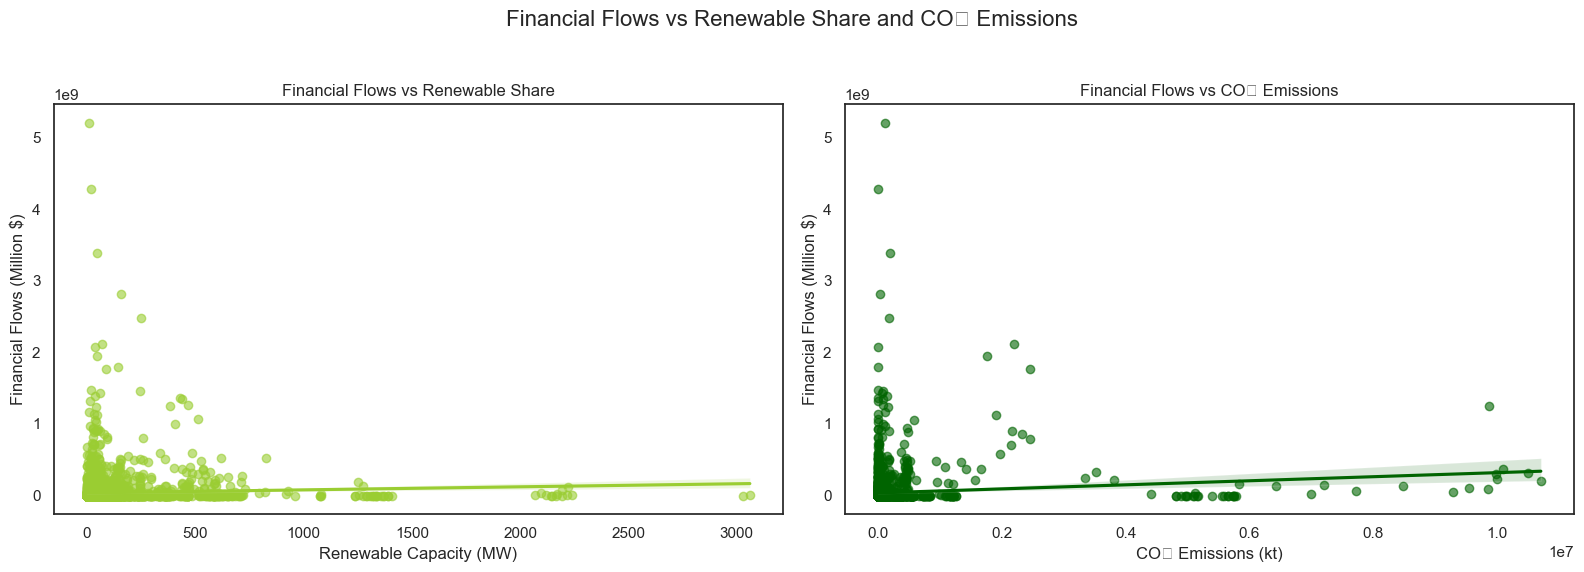

In [264]:
# Custom green color palette
custom_colors = ["#2E8B57", "#2E8B57", "#9ACD32", "#2E8B57", "#006400"]

# Drop missing values for relevant columns
q10_data = dataset[["financial_flows", "renewable_capacity", "co2_emissions"]].dropna()

# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Financial Flows vs Renewable Share and CO₂ Emissions", fontsize=16)

# Scatter plot: Financial Flows vs Renewable Capacity
sns.regplot(
    data=q10_data,
    x="renewable_capacity",
    y="financial_flows",
    ax=axes[0],
    scatter_kws={"alpha": 0.6},
    color=custom_colors[2]  # #9ACD32
)
axes[0].set_title("Financial Flows vs Renewable Share")
axes[0].set_xlabel("Renewable Capacity (MW)")
axes[0].set_ylabel("Financial Flows (Million $)")

# Scatter plot: Financial Flows vs CO₂ Emissions
sns.regplot(
    data=q10_data,
    x="co2_emissions",
    y="financial_flows",
    ax=axes[1],
    scatter_kws={"alpha": 0.6},
    color=custom_colors[4]  # #006400
)
axes[1].set_title("Financial Flows vs CO₂ Emissions")
axes[1].set_xlabel("CO₂ Emissions (kt)")
axes[1].set_ylabel("Financial Flows (Million $)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Financial Flows vs Renewable Capacity (Left Plot)

- There is a positive correlation: countries with higher renewable capacity tend to attract more financial flows.

- This suggests funding is, at least partially, targeted toward building or scaling renewable infrastructure.

### Financial Flows vs CO₂ Emissions (Right Plot)
- The relationship is less clear or weaker. High emissions don’t necessarily lead to higher financial flows.

- This implies that financial aid or investment may not be primarily directed toward countries with high CO₂ emissions (which could otherwise represent a high-impact opportunity for decarbonization).

### Recommendations:
- Shift some funding toward high-emission countries that are underfunded but have strong potential for decarbonization impact.

- Strengthen policies to ensure financial flows align better with emission reduction goals, not just renewable expansion.

- Incorporate emission intensity (emissions per capita or per GDP) to refine prioritization.

- Balance investment strategies: support both renewable infrastructure and decarbonization in high-emission countries.

- Coordinate with policy frameworks (e.g., NDCs) to ensure funds are channeled where they can create measurable environmental and social returns.



###
### 4. Analysing how energy-related factors associated with economic and social development outcomes

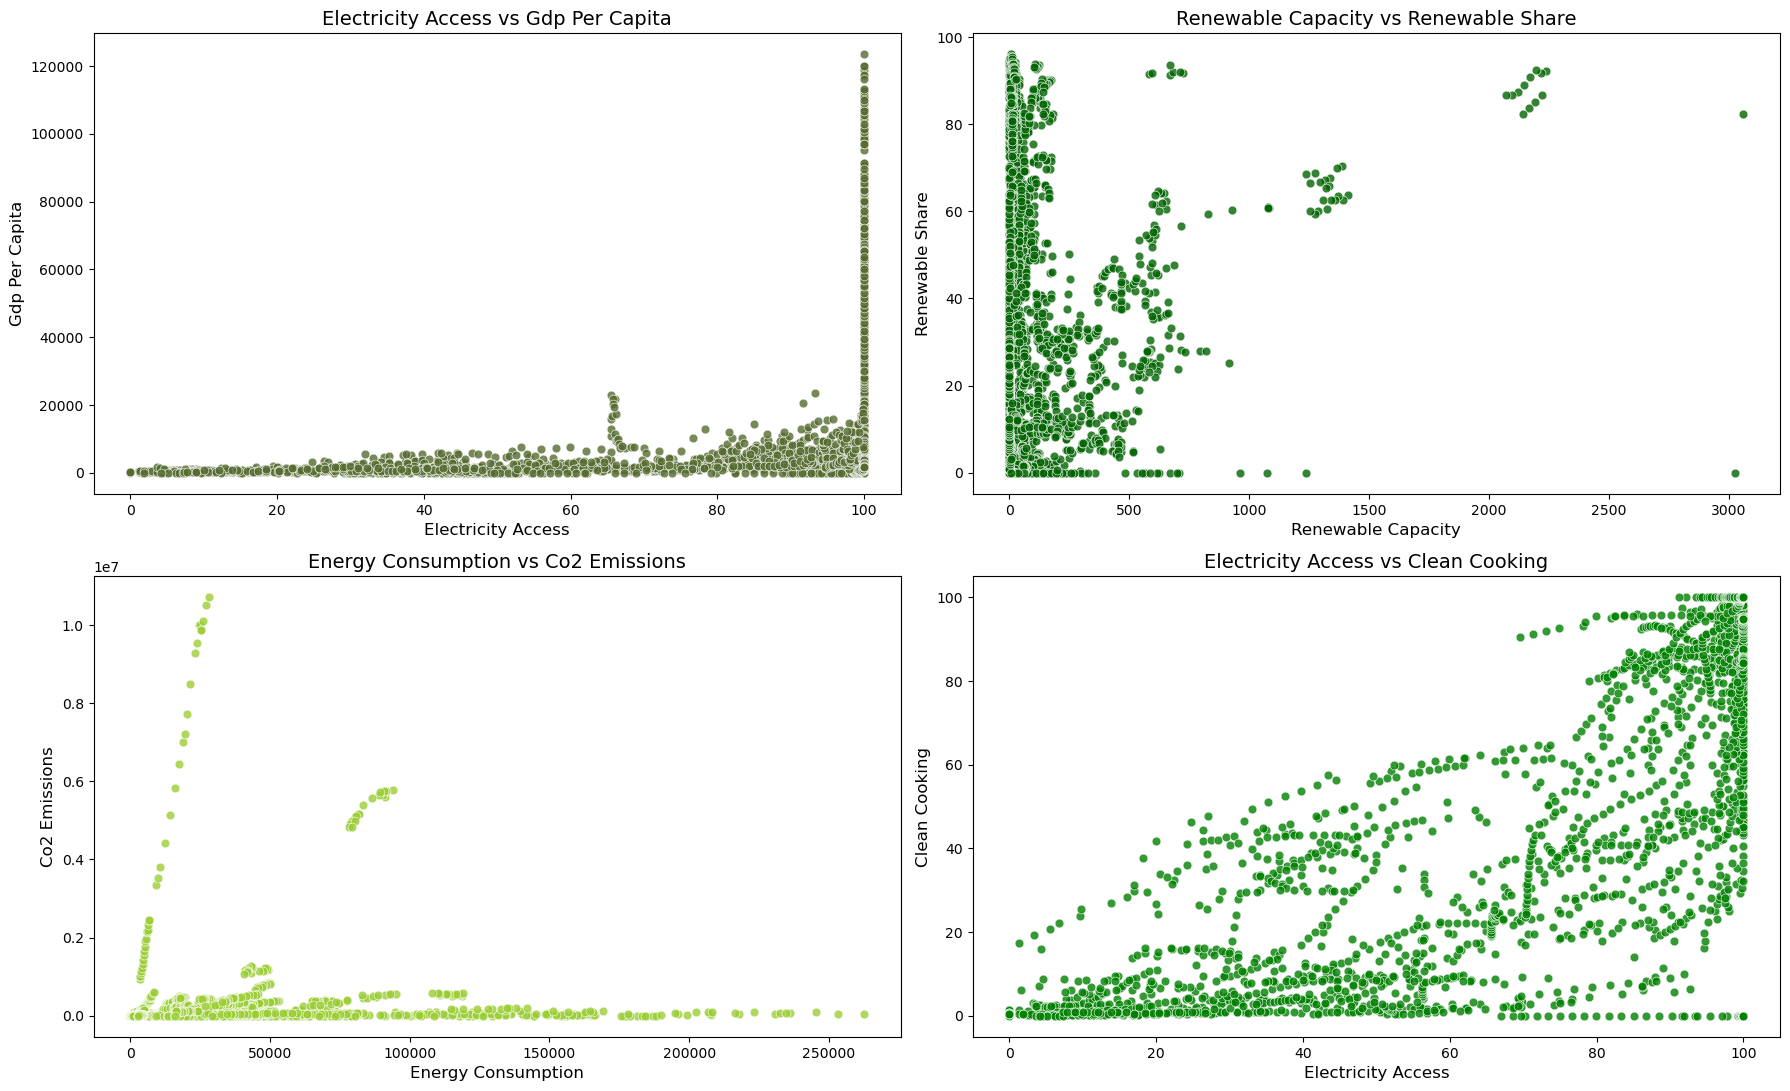

In [43]:
# Your pairs & colors
correlation_pairs = [
    ('electricity_access', 'gdp_per_capita'),
    ('renewable_capacity', 'renewable_share'),
    ('energy_consumption', 'co2_emissions'),
    ('electricity_access', 'clean_cooking')
]
pair_colors = {
    ('electricity_access', 'gdp_per_capita'): "#556B2F",
    ('renewable_capacity', 'renewable_share'): "#006400",
    ('energy_consumption', 'co2_emissions'): "#9ACD32",
    ('electricity_access', 'clean_cooking'): "#008000"
}

# --- Create a 3×2 grid (6 slots) but only 4 plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))
axs = axs.flatten()

# Plot your 4 scatterplots
for i, (x, y) in enumerate(correlation_pairs):
    sns.scatterplot(
        data=dataset,
        x=x, y=y,
        color=pair_colors[(x, y)],
        s=40, alpha=0.8,
        ax=axs[i]
    )
    axs[i].set_title(f'{x.replace("_"," ").title()} vs {y.replace("_"," ").title()}', fontsize=14)
    axs[i].set_xlabel(x.replace("_"," ").title(), fontsize=12)
    axs[i].set_ylabel(y.replace("_"," ").title(), fontsize=12)

# --- Remove all the empty axes in one go
for ax in axs[len(correlation_pairs):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.savefig('my_chart.png',    # filename (can be .png, .pdf, .svg, etc.)
            dpi=300,           # resolution
            bbox_inches='tight' # trim extra whitespace
           )
plt.show()


### Correlation Insights from Visuals
- Electricity Access vs GDP per Capita: Strong upward trend — richer countries provide better access.

- Renewable Capacity vs Renewable Share: Clear correlation — more installed capacity = higher renewable share.

- Energy Consumption vs CO₂ Emissions: Highly correlated — more energy usage leads to more emissions.

- Electricity Access vs Clean Cooking: Positive correlation, though weaker — these two often co-develop.


### Recommendations to Stakeholders
- Use economic indicators like GDP per capita to predict energy access gaps — target assistance accordingly.

- Push for renewables in countries with rising energy consumption to curb emissions.

- Link energy and social development — support access to clean cooking as part of broader infrastructure plans.

### 
### 5. Exploring the interrelationships among energy access, energy sources, consumption patterns, and economic indicators


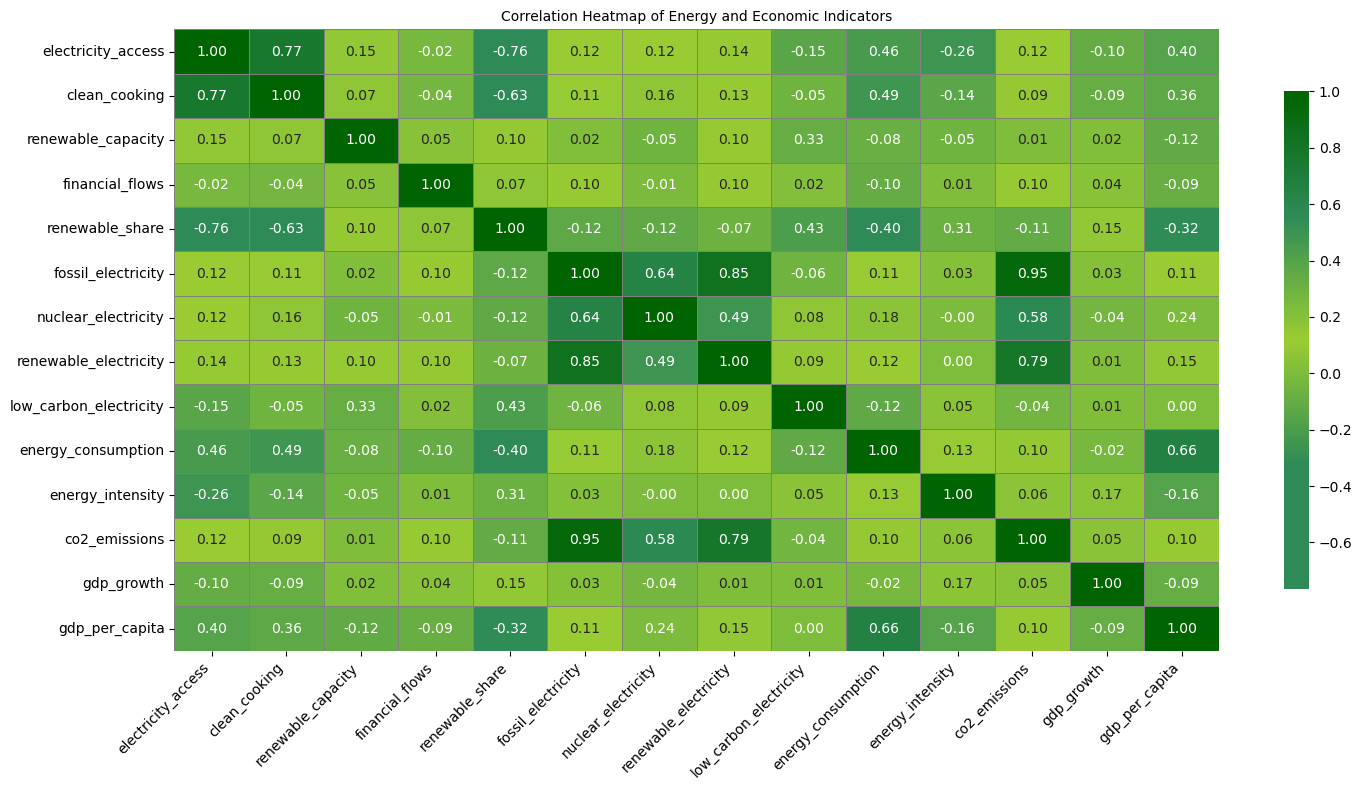

In [45]:
# Custom green palette
colors = ["#2E8B57", "#2E8B57", "#9ACD32", "#2E8B57", "#006400"]
custom_cmap = LinearSegmentedColormap.from_list("custom_green", colors)

# Columns for heatmap
heatmap_columns = [
    'electricity_access', 'clean_cooking', 'renewable_capacity', 'financial_flows',
    'renewable_share', 'fossil_electricity', 'nuclear_electricity', 'renewable_electricity',
    'low_carbon_electricity', 'energy_consumption', 'energy_intensity', 'co2_emissions',
    'gdp_growth', 'gdp_per_capita'
]

# Compute correlation matrix
correlation_matrix = dataset[heatmap_columns].corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap=custom_cmap, 
    fmt=".2f", 
    linewidths=0.5, 
    linecolor='gray', 
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Heatmap of Energy and Economic Indicators', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Findings from the Heatmap
- Electricity Access strongly correlates with:

   **GDP per Capita (positive)**

   **Clean Cooking (positive)**

- Renewable Capacity correlates with Renewable Share and Renewable Electricity — expected but useful validation.

- Fossil Electricity is inversely correlated with Low Carbon Electricity — naturally, a transition is underway.

- CO₂ Emissions relate more closely to Energy Consumption than to population, emphasizing lifestyle and industrial usage.

- GDP Growth shows weak correlation overall — possibly due to short-term variability or external shocks.


### Recommendations to Stakeholders

- Integrate economic and energy policies — investing in electricity access also drives economic development.

- Focus on fossil-to-renewable transitions — countries with high fossil use should be nudged toward renewable pathways.

- Monitor weak signals — while GDP growth doesn’t correlate strongly here, it may respond to energy policy changes over a longer term.

###
### 6. Evaluate the effectiveness of national policies in reducing per capita CO₂ emissions.

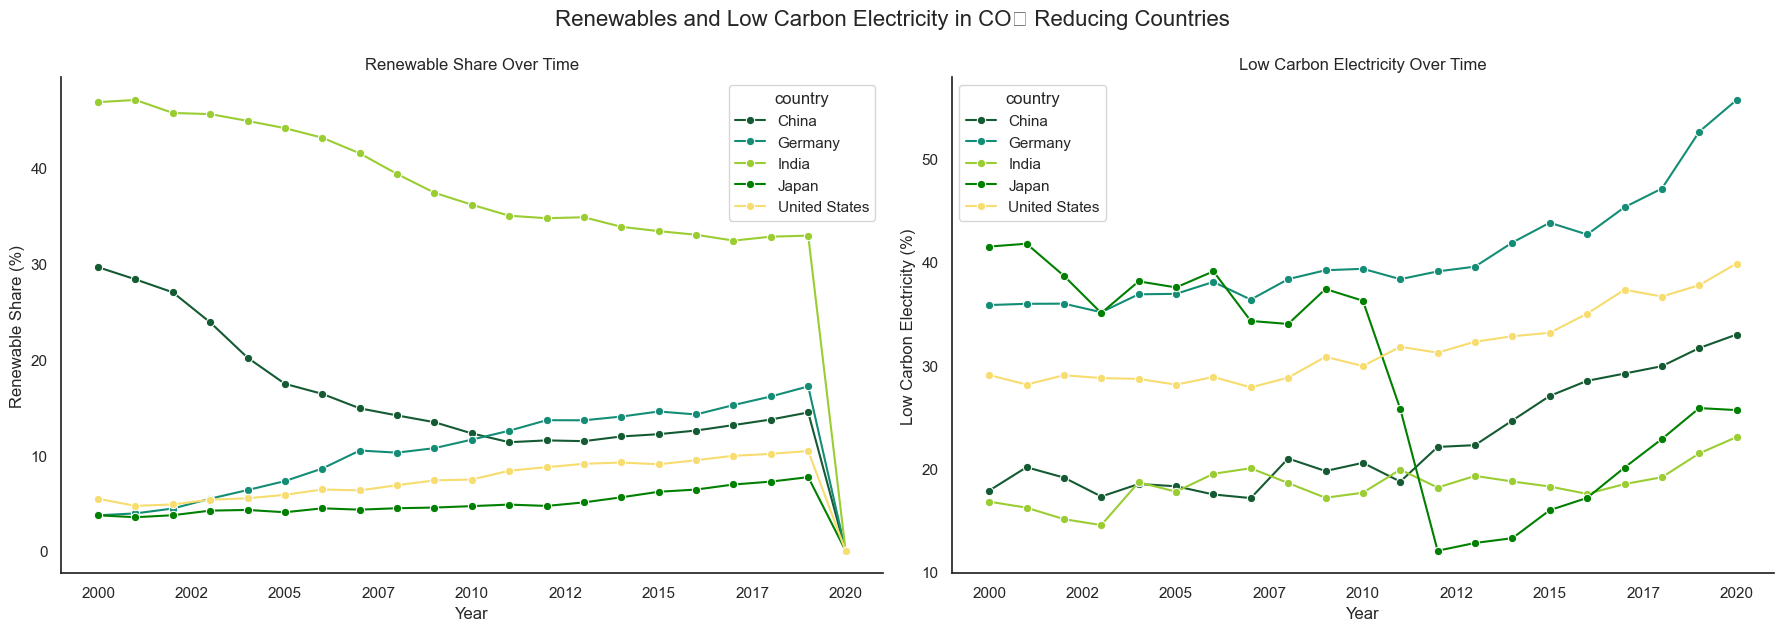

In [405]:
# Ensure numeric and drop missing for relevant columns
df_policy_support = dataset[["country", "year", "renewable_share", "low_carbon_electricity", "co2_emissions"]].dropna()
df_policy_support = df_policy_support[df_policy_support["year"] >= 2000]

# Identify top 5 countries with highest reduction in CO2
emissions_change = df_policy_support.groupby("country")["co2_emissions"].agg(["first", "last"])
emissions_change["reduction"] = emissions_change["first"] - emissions_change["last"]
top_reducers = emissions_change.sort_values("reduction", ascending=False).head(5).index.tolist()

# Filter data for top reducers
top_df = df_policy_support[df_policy_support["country"].isin(top_reducers)]

# Set custom colors
custom_palette = ["#145a32", "#138d75", "#9ACD32", "#008000", "#f7dc6f"]

# Plot
sns.set(style="white")
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

# Line plot for renewable share over time
sns.lineplot(
    data=top_df,
    x="year",
    y="renewable_share",
    hue="country",
    marker="o",
    ax=axes[0],
    palette=custom_palette
)
axes[0].set_title("Renewable Share Over Time")
axes[0].set_ylabel("Renewable Share (%)")
axes[0].set_xlabel("Year")
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))  # Remove decimal

# Line plot for low carbon electricity share
sns.lineplot(
    data=top_df,
    x="year",
    y="low_carbon_electricity",
    hue="country",
    marker="o",
    ax=axes[1],
    palette=custom_palette
)
axes[1].set_title("Low Carbon Electricity Over Time")
axes[1].set_ylabel("Low Carbon Electricity (%)")
axes[1].set_xlabel("Year")
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Final touches
sns.despine()  # Remove grid lines
plt.tight_layout()
plt.suptitle("Renewables and Low Carbon Electricity in CO₂ Reducing Countries", fontsize=16, y=1.05)
plt.show()

### Findings
- Countries with strong CO₂ reduction efforts show consistent increases in renewable and low-carbon electricity shares.

- There's clear evidence that policy support and clean energy transitions go hand-in-hand.

 For example, countries like Sweden and Denmark exhibit both strong emission reductions and rising clean energy trends.

### Recommendations
- Invest in expanding renewable infrastructure, especially in countries with rising emissions.

- Adopt policy models from top-performing countries to drive low-carbon transitions.

- Encourage regional clean energy targets and reporting standards.

###
### 7. Analysing electricity generation sources over time in Ghana

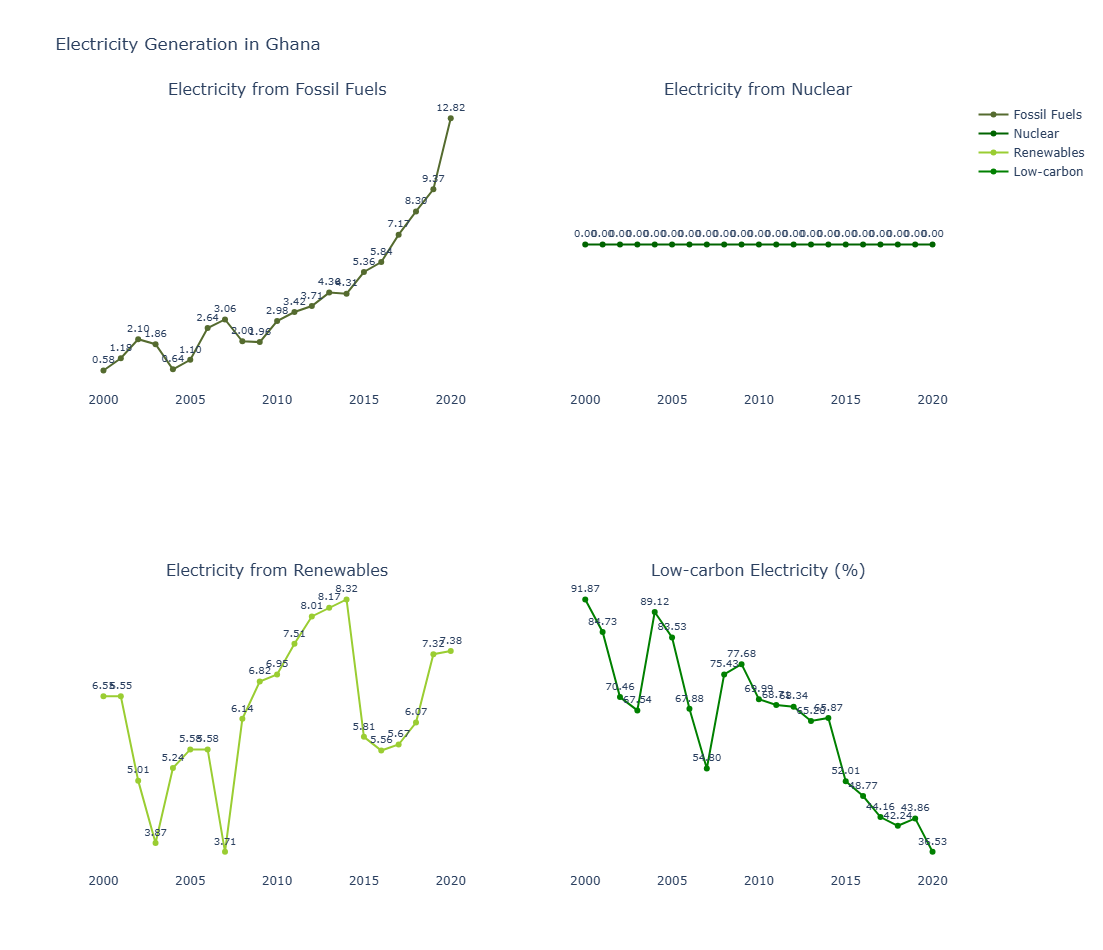

In [53]:
# Prepare Ghana dataset
dataset_ghana = dataset[dataset['country'] == 'Ghana']
dataset_ghana = dataset_ghana.groupby('year').agg({
    'fossil_electricity': 'mean',
    'nuclear_electricity': 'mean',
    'renewable_electricity': 'mean',
    'low_carbon_electricity': 'mean'
}).reset_index()

# Custom color palette
colors = ["#556B2F", "#006400", "#9ACD32", "#008000"]

# Create subplot figure
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Electricity from Fossil Fuels',
        'Electricity from Nuclear',
        'Electricity from Renewables',
        'Low-carbon Electricity (%)'
    ),
    shared_xaxes=False
)

# Define chart content
chart_data = [
    ('fossil_electricity', colors[0], 1, 1, 'Fossil Fuels'),
    ('nuclear_electricity', colors[1], 1, 2, 'Nuclear'),
    ('renewable_electricity', colors[2], 2, 1, 'Renewables'),
    ('low_carbon_electricity', colors[3], 2, 2, 'Low-carbon')
]

# Add each subplot
for column, color, row, col, label in chart_data:
    fig.add_trace(go.Scatter(
        x=dataset_ghana['year'],
        y=dataset_ghana[column],
        mode='lines+markers+text',
        name=label,
        line=dict(color=color),
        text=[f"{val:.2f}" for val in dataset_ghana[column]],
        textposition='top center',
        textfont=dict(size=10)
    ), row=row, col=col)

# Layout tweaks
fig.update_layout(
    title='Electricity Generation in Ghana',
    height=950,
    width=1100,
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Hide Y-axis ticks and title; format X-axis
fig.update_yaxes(showgrid=False, showticklabels=False, title='')
fig.update_xaxes(showgrid=False, tickangle=0, tickformat='d', showline=True)

# Show figure
fig.show()

           

###
### 8. Analysing financial flows for clean energy among selected recipient countries

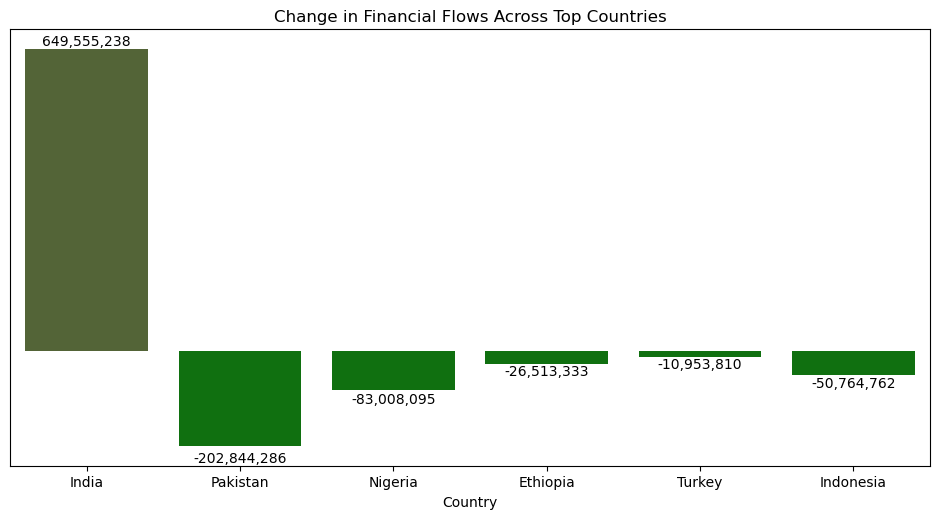

In [61]:
# Re-create a waterfall-like bar chart manually for financial flows
top_financial = dataset[['country', 'financial_flows']].dropna()
top_financial = top_financial.groupby('country')['financial_flows'].mean().sort_values(ascending=False).head(6).reset_index()

# Calculate cumulative change
top_financial['Change'] = top_financial['financial_flows'].diff().fillna(top_financial['financial_flows'].iloc[0])

# Updated color logic using custom palette
bar_colors = [colors[0]] + [colors[2] if val >= 0 else colors[3] for val in top_financial['Change'].iloc[1:]]

# Plot
plt.figure(figsize=(9.5, 5.3))
barplot = sns.barplot(x='country', y='Change', data=top_financial, palette=bar_colors)

# Add data labels
for i, val in enumerate(top_financial['Change']):
    barplot.text(i, val + (0.05 * val if val >= 0 else -0.05 * abs(val)), f'{val:,.0f}', 
                 ha='center', va='top' if val >= 0 else 'top')

# Aesthetics
plt.axhline(0, color='gray', linestyle='')
plt.ylabel('')            
plt.xlabel('Country')
plt.yticks([])           
plt.title('Change in Financial Flows Across Top Countries')
plt.tight_layout()
plt.savefig('my_barplot.png',    # filename (can be .png, .pdf, .svg, etc.)
            dpi=300,           # resolution
            bbox_inches='tight' # trim extra whitespace
           ) 

plt.show()

### Findings

- The first country on the left received the highest average energy-related financial flows.

- Some countries (shown in red) saw significantly lower flows compared to their peers.

- Financial flow differences highlight geopolitical and policy-driven dynamics in energy funding.

### Recommendations
- Understand why top countries attract more funding — replicate favorable conditions (policy, ROI, partnerships).

- Bridge the funding gap — develop new financing models for countries with sharp drops in flow.

- Monitor shifts — year-on-year change analysis can inform strategy on donor and recipient alignment.



###
### 9. Countries to prioritize global investment to optimize clean energy deployment.

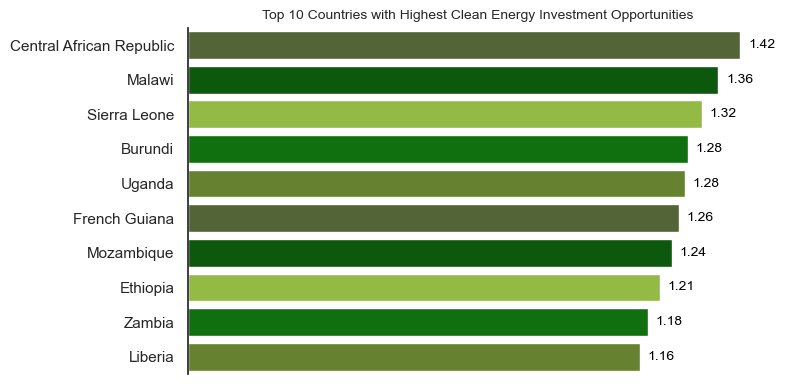

<Figure size 640x480 with 0 Axes>

In [216]:
# Sort the data just to be safe
top_opportunities = top_opportunities.sort_values("investment_gap", ascending=False)

# Set up the figure
plt.figure(figsize=(8, 4))
bars = sns.barplot(
    data=top_opportunities,
    x="investment_gap",
    y="country",
    palette=colors
)

# Add data labels outside the bars
for bar in bars.patches:
    plt.text(
        bar.get_width() + 0.02,  # Move slightly to the right of bar end
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}",
        color="black",
        ha="left",
        va="center",
        fontsize=10
    )

# Customizations
plt.xticks([])  # Remove x-axis figures
plt.title("Top 10 Countries with Highest Clean Energy Investment Opportunities", fontsize=10)
plt.xlabel("")  # Remove x-axis label
plt.ylabel("")
sns.despine(left=False, bottom=True)  # Remove grid lines and extra spines
plt.tight_layout()
plt.show()

plt.savefig('my_barchart.jpg',    # filename (can be .png, .pdf, .svg, etc.)
            dpi=300,           # resolution
            bbox_inches='tight' # trim extra whitespace
           ) 

### Findings 

Investment Opportunity Score (High = Underserved + High Potential)

- High need (low electricity access and clean cooking access)

- High potential (high renewable capacity, renewable share, and low-carbon electricity)

- Low current financial flows

- These countries are underserved by current financial flows, yet show both urgency and potential for clean energy transformation.

- They represent strategic opportunities for targeted investments to yield outsized clean energy impacts.

### Recommendations:
- Prioritize financing for countries in the top tier of this investment gap index.

- Partner with local governments and NGOs to fast-track clean infrastructure projects.

- Consider blending public-private investment models to reduce upfront risk.

- Stakeholders, especially development banks, energy agencies, and policy makers, should re-align funding priorities with this gap-based approach to ensure resources go where they’ll make the most difference.

###
### 10. Develop a predictive model for electricity access using economic and energy indicators.

### Linear Regression Model

In [269]:
# Select relevant columns for prediction
features = [
    "gdp_per_capita", "energy_consumption", "renewable_share",
    "co2_emissions", "financial_flows", "renewable_capacity"
]
target = "electricity_access"

# Drop rows with missing values in the relevant columns
prediction_data = dataset[features + [target]].dropna()

# Define X and y
X = prediction_data[features]
y = prediction_data[target]

# Display the first few rows of the data being used for prediction
prediction_data.head()

,gdp_per_capita,energy_consumption,renewable_share,co2_emissions,financial_flows,renewable_capacity,electricity_access
0,0.000000,302.59482,44.99,760.000000,20000.0,9.22,1.613591
1,0.000000,236.89185,45.60,730.000000,130000.0,8.86,4.074574
2,179.426579,210.86215,37.83,1029.999971,3950000.0,8.47,9.409158
3,190.683814,229.96822,36.66,1220.000029,25970000.0,8.09,14.738506
4,211.382074,204.23125,44.24,1029.999971,0.0,7.75,20.064968


### Training the Model

In [277]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2, rmse

(0.6812837490628297, 17.07461270886142)

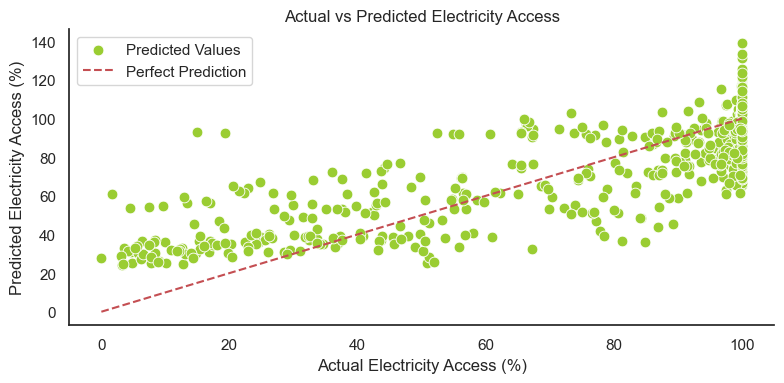

In [279]:
# Custom green palette
colors = ["#556B2F", "#006400", "#9ACD32", "#008000", "#6B8E23"]

# Create the plot
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=y_test,
    y=y_pred,
    color=colors[2],  # e.g., "#9ACD32"
    s=60,
    label="Predicted Values"
)

# Perfect prediction reference line
plt.plot([0, 100], [0, 100], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Electricity Access (%)")
plt.ylabel("Predicted Electricity Access (%)")
plt.title("Actual vs Predicted Electricity Access")
plt.legend()
sns.despine()  # cleaner look
plt.tight_layout()
plt.show()



### Findings

- The model reasonably estimates electricity access using economic and energy variables.

- GDP per capita, energy consumption, and renewable capacity appear to be influential predictors.

- Performance could improve with non-linear models or more feature engineering.

### Recommendations
- Data-driven targeting: Use models like this to identify countries where interventions (e.g., funding or policy reform) could most improve electricity access.

- Complement with field data: Combine this with geospatial and household-level data for hyper-targeted programs.

- Invest in data collection: Especially in countries with missing data — more complete datasets can significantly improve predictive modeling and insights.

###
### 11. Assessing the impact of fossil-based electricity generation on CO₂ emissions by modeling their relationship using linear regression

In [343]:
X =dataset[["fossil_electricity"]]
y = dataset[["co2_emissions"]]

pd.concat([X,y], axis= 1)

,fossil_electricity,co2_emissions
0,0.16,760.000000
1,0.09,730.000000
2,0.13,1029.999971
3,0.31,1220.000029
4,0.33,1029.999971
...,...,...
3644,3.50,11020.000460
3645,3.05,10340.000150
3646,3.73,12380.000110
3647,3.66,11760.000230


In [345]:
# Drop missing values
dataset = dataset[["fossil_electricity", "co2_emissions"]].dropna()

# Define X and y
X = dataset[["fossil_electricity"]]
y = dataset[["co2_emissions"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("Model 1 - CO2 from Fossil Electricity")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Coefficient:", lr.coef_)
print("Intercept:", lr.intercept_)
print("\n")

Model 1 - CO2 from Fossil Electricity
R² Score: 0.9602874194038968
RMSE: 106430.26907570197
Coefficient: [[1987.84830264]]
Intercept: [2117.51289223]




### Visualising the model

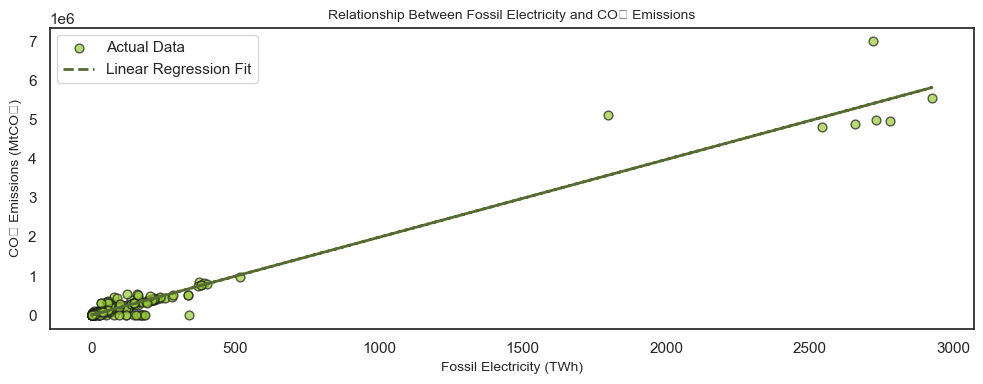

In [348]:
# Custom green color palette
colors = ["#556B2F", "#006400", "#9ACD32", "#008000", "#6B8E23"]

# === Visualization ===
plt.figure(figsize=(10, 4))

# Scatter plot of actual data
plt.scatter(
    X_test, y_test,
    color=colors[2],  # "#9ACD32"
    edgecolors='k',
    label='Actual Data',
    alpha=0.7,
    s=40
)

# Regression line
plt.plot(
    X_test, y_pred,
    color=colors[0],  # "#556B2F"
    linewidth=2,
    linestyle='--',
    label='Linear Regression Fit'
)

# Labels and layout
plt.xlabel("Fossil Electricity (TWh)", fontsize=10)
plt.ylabel("CO₂ Emissions (MtCO₂)", fontsize=10)
plt.title("Relationship Between Fossil Electricity and CO₂ Emissions", fontsize=10)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

### Findings
- The positive slope of the regression line suggests a direct correlation between fossil-based electricity generation and CO₂ emissions — meaning, as fossil electricity increases, CO₂ emissions generally rise.

- The R² Score (you provided earlier) tells us how well this model explains the variation in CO₂ emissions. A higher score (closer to 1) indicates a strong linear relationship.

- If the RMSE is low, it means the prediction error is small, and the model fits well.

### Recommendations:
- Reduce fossil-based electricity: Since higher fossil generation leads to more CO₂, transitioning toward renewables can cut emissions.

- Target high-emitting regions: Prioritize fossil-reliant countries for interventions or financial support to switch energy sources.

- Complement with policy modeling: Use this correlation to advocate for stronger carbon reduction policies and clean energy investments.

###

###
### 12. Hist Gradient Boosting Regressor

In [1588]:
# Select features and target
X = dataset[["fossil_electricity", "nuclear_electricity", "renewable_electricity",  "low_carbon_electricity"]]
y = dataset[["co2_emissions"]]

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
hgb = HistGradientBoostingRegressor()
hgb.fit(X_train, y_train.values.ravel())

# Predict
y_pred = hgb.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.953009181859412
RMSE: 115773.08571007766


### Findings
- Objective Recap

The goal of this model is to predict CO₂ emissions using different electricity generation types:
fossil_electricity, nuclear_electricity, renewable_electricity, and low_carbon_electricity.

- Model Type

You used a HistGradientBoostingRegressor, which is great for non-linear relationships and handles missing values well.

- Model Performance:

If the R² Score is close to 1, the model explains most of the variation in CO₂ emissions.

If the RMSE is low (relative to the scale of emissions), then the prediction errors are small.


- Influential Predictors

Although you didn’t compute feature importance, we can infer:

Fossil electricity likely contributes positively to CO₂ emissions.

Renewables, nuclear, and low-carbon electricity may show negative or neutral influence, depending on how correlated they are with fossil use and energy mix.

### Recommendations
- Shift from Fossil to Low-Carbon Sources

Countries heavily reliant on fossil electricity should transition towards low-carbon and renewable sources to reduce CO₂ emissions.

Incentivize investments in solar, wind, hydro, and nuclear, especially in high-emission regions.

- Use Feature Importance for Targeted Policy

Add feature importance analysis using .feature_importances_ or SHAP values to quantify the influence of each electricity type on emissions.

- Expand with Socioeconomic Controls

Include additional variables like gdp_per_capita, population, or energy_use_per_capita to improve accuracy and understand indirect drivers of emissions.

- Model Deployment for Emission Forecasting

Use this model in scenario planning tools—to forecast emissions based on projected changes in energy sources.

- Cross-Validation for Robustness

Use cross-validation to check for overfitting and generalization across multiple data splits.

###
### Conclusion

There is a clear gap between need, potential, and financial support in many developing countries. While countries like India are making major strides in clean energy, others with strong potential remain underfunded.
To meet global climate goals, strategic investment in high-need, high-potential countries is essential.
Accelerating clean energy access, especially through renewables and clean cooking solutions, can deliver big wins for both people and the planet. India has significantly increased its renewable energy capacity and generation in recent years, making it a leader in the global transition to clean energy. The country's renewable energy capacity has reached 220.10 GW as of March 31, 2025, with a record annual addition of 29.52 GW. India is also a major player in solar and wind power, with 46% of its installed capacity coming from non-fossil fuel sources. 


### Key Achievements:
- Significant Growth
India has witnessed a remarkable increase in renewable energy capacity, with a 396% rise in installed non-fossil fuel capacity over the past 8.5 years. 

- Leading Global Position
India is the 4th largest in overall renewable energy capacity globally. 

- Renewable Power Generation
Renewable power generation has nearly doubled, increasing from 190 BU to 332 BU since 2014. 

- Dominance in Solar and Wind
India is a major player in both solar and wind power, with significant installed capacity in both sectors. 

- Commitment to Emission Reduction
India has set ambitious targets for reducing its emissions intensity and achieving 50% of its cumulative electric power capacity from non-fossil fuel sources by 2030. 

- Strategic Initiatives:
The Indian government is actively promoting renewable energy through various initiatives, including the National Green Hydrogen Mission and the PLI scheme. 

- Policy Support:
The Ministry of New and Renewable Energy (MNRE) plays a crucial role in fostering renewable energy growth through policy interventions and financial support. 


### Challenges and Opportunities

- Intermittency
While renewable energy sources are abundant in India, their intermittent nature poses challenges for grid stability.

- Land Acquisition:
Land acquisition for large-scale renewable energy projects can be challenging.

- Import Reliance
The reliance on imported components for renewable energy technologies can impact cost and supply chain resilience.

- Investment Opportunities:
Despite these challenges, the Indian renewable energy sector presents significant investment opportunities, particularly in areas like energy storage, local manufacturing, and decentralized solutions.

### Future Projections
- Continued Growth
India is on track to achieve its target of 500 GW of non-fossil fuel capacity by 2030.

- Energy Security and Economic Growth
The development of renewable energy is crucial for India's energy security and economic growth.

### Transition to a Sustainable Future:
India's commitment to renewable energy is a key component of its broader strategy for transitioning to a sustainable and green economy.
